In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
texts = [
    "Jestem bardzo zły na tę sytuację.",          # 0 złość
    "To mnie wkurza do granic możliwości.",       # 0 złość
    "Jestem spokojny, nie czuję emocji.",         # 3 neutral
    "Dzisiaj czuję się szczęśliwy!",              # 2 radość
    "Czuję się przygnębiony i smutny.",           # 1 smutek
    "Nic mnie dzisiaj nie rusza.",                # 3 neutral
    "Ogromna radość mnie rozpiera!",              # 2 radość
    "Mam dość, jestem wściekły!",                 # 0 złość
    "Wszystko jest w porządku.",                  # 3 neutral
    "Dzień minął mi bardzo dobrze.",              # 2 radość
    "Jest mi przykro z tego powodu.",             # 1 smutek
    "Straciłem motywację do działania.",          # 1 smutek
    "Nie mam na nic ochoty.",                     # 1 smutek
    "Uśmiecham się cały dzień.",                  # 2 radość
    "Czuję się po prostu normalnie.",             # 3 neutral
    "Wkurza mnie taka bezsilność.",               # 0 złość
    "Jestem bardzo wdzięczny za pomoc.",          # 2 radość
    "Nic specjalnego się nie dzieje.",            # 3 neutral
    "Jestem rozczarowany.",                       # 1 smutek
    "Chciałbym wybuchnąć ze złości.",             # 0 złość
]
labels = [0,0,3,2,1,3,2,0,3,2,1,1,1,2,3,0,2,3,1,0]

In [3]:
# Mapowanie etykiet
emotion_map = {0: "złość", 1: "smutek", 2: "radość", 3: "neutral"}


In [4]:
# 2. Przetwarzanie tekstu
vocab_size = 1000
max_length = 20
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok, lower=True)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [5]:
# Podział na train/test
train_size = int(0.75 * len(texts))
X_train, X_test = padded[:train_size], padded[train_size:]
y_train, y_test = np.array(labels[:train_size]), np.array(labels[train_size:])

In [6]:
# 3. Model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# 4. Trening
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), verbose=2)

Epoch 1/40
1/1 - 2s - 2s/step - accuracy: 0.2667 - loss: 1.3863 - val_accuracy: 0.2000 - val_loss: 1.3886
Epoch 2/40
1/1 - 0s - 85ms/step - accuracy: 0.2667 - loss: 1.3855 - val_accuracy: 0.2000 - val_loss: 1.3891
Epoch 3/40
1/1 - 0s - 85ms/step - accuracy: 0.2667 - loss: 1.3849 - val_accuracy: 0.2000 - val_loss: 1.3898
Epoch 4/40
1/1 - 0s - 84ms/step - accuracy: 0.2667 - loss: 1.3844 - val_accuracy: 0.2000 - val_loss: 1.3904
Epoch 5/40
1/1 - 0s - 138ms/step - accuracy: 0.2667 - loss: 1.3839 - val_accuracy: 0.2000 - val_loss: 1.3910
Epoch 6/40
1/1 - 0s - 82ms/step - accuracy: 0.2667 - loss: 1.3834 - val_accuracy: 0.2000 - val_loss: 1.3917
Epoch 7/40
1/1 - 0s - 140ms/step - accuracy: 0.2667 - loss: 1.3829 - val_accuracy: 0.2000 - val_loss: 1.3924
Epoch 8/40
1/1 - 0s - 82ms/step - accuracy: 0.2667 - loss: 1.3824 - val_accuracy: 0.2000 - val_loss: 1.3930
Epoch 9/40
1/1 - 0s - 83ms/step - accuracy: 0.2667 - loss: 1.3819 - val_accuracy: 0.2000 - val_loss: 1.3933
Epoch 10/40
1/1 - 0s - 99ms/

In [8]:
# 5. Heurystyka decyzyjna
def heuristic_action(predicted_class, confidence):
    if predicted_class == 0 and confidence > 0.8:
        return "Wyślij ostrzeżenie – silna złość!"
    elif predicted_class == 2 and confidence > 0.8:
        return "Odpowiedz z wdzięcznością – pozytywny ton."
    else:
        return "Brak reakcji / loguj do dziennika."

In [9]:
# 6. Predykcja i heurystyka
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)
confidences = np.max(pred_probs, axis=1)

for i, text in enumerate(texts[train_size:]):
    print(f"Tekst: {text}")
    print(f"Emocja przewidywana: {emotion_map[pred_classes[i]]}, Pewność: {confidences[i]:.2f}")
    print(f"Reakcja heurystyczna: {heuristic_action(pred_classes[i], confidences[i])}")
    print('-'*40)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Tekst: Wkurza mnie taka bezsilność.
Emocja przewidywana: neutral, Pewność: 0.28
Reakcja heurystyczna: Brak reakcji / loguj do dziennika.
----------------------------------------
Tekst: Jestem bardzo wdzięczny za pomoc.
Emocja przewidywana: neutral, Pewność: 0.28
Reakcja heurystyczna: Brak reakcji / loguj do dziennika.
----------------------------------------
Tekst: Nic specjalnego się nie dzieje.
Emocja przewidywana: neutral, Pewność: 0.28
Reakcja heurystyczna: Brak reakcji / loguj do dziennika.
----------------------------------------
Tekst: Jestem rozczarowany.
Emocja przewidywana: neutral, Pewność: 0.28
Reakcja heurystyczna: Brak reakcji / loguj do dziennika.
----------------------------------------
Tekst: Chciałbym wybuchnąć ze złości.
Emocja przewidywana: neutral, Pewność: 0.28
Reakcja heurystyczna: Brak reakcji / loguj do dziennika.
----------------------------------------


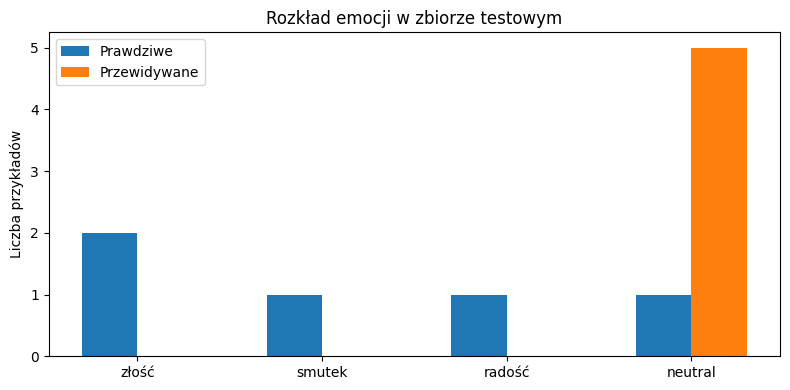

In [10]:
# 7. Wizualizacja rozkładu emocji (test real vs pred)
plt.figure(figsize=(8,4))
true_counts = np.bincount(y_test, minlength=4)
pred_counts = np.bincount(pred_classes, minlength=4)
x = np.arange(4)
plt.bar(x-0.15, true_counts, width=0.3, label="Prawdziwe")
plt.bar(x+0.15, pred_counts, width=0.3, label="Przewidywane")
plt.xticks(x, [emotion_map[i] for i in x])
plt.ylabel("Liczba przykładów")
plt.title("Rozkład emocji w zbiorze testowym")
plt.legend()
plt.tight_layout()
plt.show()


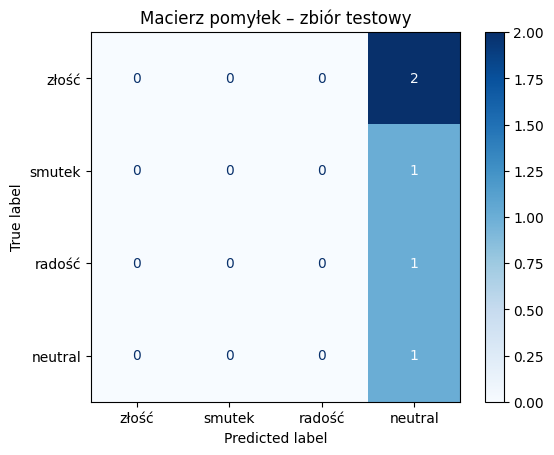

In [11]:
# 8. Confusion matrix
cm = confusion_matrix(y_test, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[emotion_map[i] for i in range(4)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Macierz pomyłek – zbiór testowy")
plt.show()

In [12]:
# 9. Przykład analizy emergencji (dla chętnych)
# Spróbujmy tekstu "Super, aż się chce śmiać przez łzy." (ambiwalentny)
test_sentence = ["Super, aż się chce śmiać przez łzy."]
seq = tokenizer.texts_to_sequences(test_sentence)
pad = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
pred = model.predict(pad)
pred_class = np.argmax(pred)
print(f"Emergencja? Tekst: {test_sentence[0]}")
print(f"Predykcja: {emotion_map[pred_class]}, Pewność: {np.max(pred):.2f}")
# Jeśli model wyczuwa ambiwalencję (radość, smutek lub neutralność) – jest to cecha emergentna!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Emergencja? Tekst: Super, aż się chce śmiać przez łzy.
Predykcja: neutral, Pewność: 0.28
